<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data: Wholesale customers data
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes) 
customers = wholesale_customers.data.features 
y = wholesale_customers.data.targets 


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

Feature Info:
   Channel  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2  12669  9656     7561     214              2674        1338
1        2   7057  9810     9568    1762              3293        1776
2        2   6353  8808     7684    2405              3516        7844
3        1  13265  1196     4221    6404               507        1788
4        2  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB
None

Target

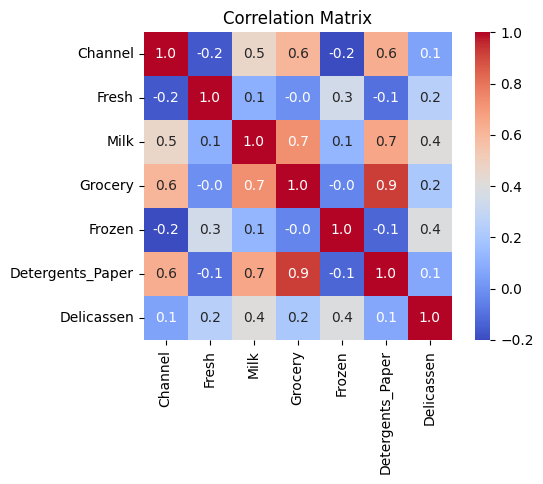

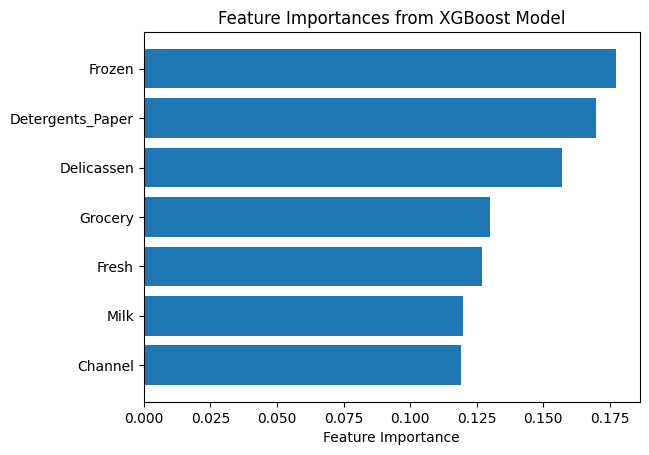


Min values in df:
Channel              1
Fresh                3
Milk                55
Grocery              3
Frozen              25
Detergents_Paper     3
Delicassen           3
dtype: int64

Max values in df:
Channel                  2
Fresh               112151
Milk                 73498
Grocery              92780
Frozen               60869
Detergents_Paper     40827
Delicassen           47943
dtype: int64


In [3]:
# Your code here:
  
# variable information 
#print(wholesale_customers.variables)

print("Feature Info:")
print(customers.head())  # Check first few rows
print(customers.info())  # Check data types
print()

print("Target Info:")
print(customers.head())  # Check first few rows
print(customers.info())  # Check data types
print()

# print correlation matrix
correlation_matrix = customers.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
print()
print()

# print feature importance
import xgboost as xgb
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(customers,y)

sort_idx = model.feature_importances_.argsort()

importances = model.feature_importances_[sort_idx]
feature_names = customers.columns if hasattr(customers, 'columns') else range(customers.shape[1])
plt.barh(feature_names[sort_idx], importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances from XGBoost Model")
plt.show()

# Check data range
print()
print("Min values in df:")
print(customers.min())
print()
print("Max values in df:")
print(customers.max())


**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [4]:
customers.drop('Grocery', axis=1, inplace=True)

print(customers.head())

   Channel  Fresh  Milk  Frozen  Detergents_Paper  Delicassen
0        2  12669  9656     214              2674        1338
1        2   7057  9810    1762              3293        1776
2        2   6353  8808    2405              3516        7844
3        1  13265  1196    6404               507        1788
4        2  22615  5410    3915              1777        5185


C:\Users\Georg\AppData\Local\Temp\ipykernel_19936\3199053922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.drop('Grocery', axis=1, inplace=True)


**Analyse**

-  drop Grocery, becaue high correlation between Detergents_Paper and Delicassen
-  datatypes ok

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [5]:
from sklearn.preprocessing import StandardScaler

X = customers.values[:,0:]
X = np.nan_to_num(X)
X_scaled = StandardScaler().fit_transform(X)


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [6]:
from sklearn.cluster import KMeans

# Your code here:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_scaled)

print(k_means.labels_)

customers['labels'] = k_means.labels_

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


C:\Users\Georg\AppData\Local\Temp\ipykernel_19936\2149919677.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['labels'] = k_means.labels_


### Looking to the elbow we can choose 2 like the correct number of clusters

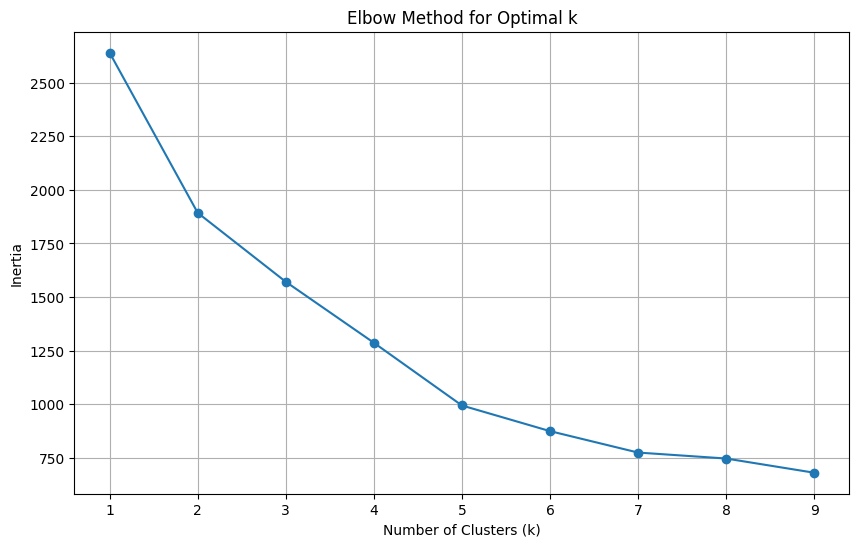

In [7]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()



In [8]:
kmeans_2 = KMeans(n_clusters=2).fit(X_scaled)

labels = kmeans_2.predict(X_scaled)

clusters = kmeans_2.labels_.tolist()

In [9]:
customers['labels'] = clusters

C:\Users\Georg\AppData\Local\Temp\ipykernel_19936\2592998178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['labels'] = clusters


Count the values in `labels`.

In [10]:
label_counts = customers['labels'].value_counts()
print(label_counts)

labels
0    416
1     24
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [11]:
from sklearn.cluster import DBSCAN 

# Your code here
m_dbscan = DBSCAN(eps=0.5)

labels = m_dbscan.fit_predict(X_scaled)

clusters = m_dbscan.labels_.tolist()

customers['labels_DBSCAN'] = clusters

Count the values in `labels_DBSCAN`.

In [12]:
# Your code here
label_counts = customers['labels_DBSCAN'].value_counts()
print(label_counts)

labels_DBSCAN
 1    224
-1    136
 0     71
 2      5
 3      4
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [13]:
def plot(x,y,hue,title):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title(title)
    return plt.show()

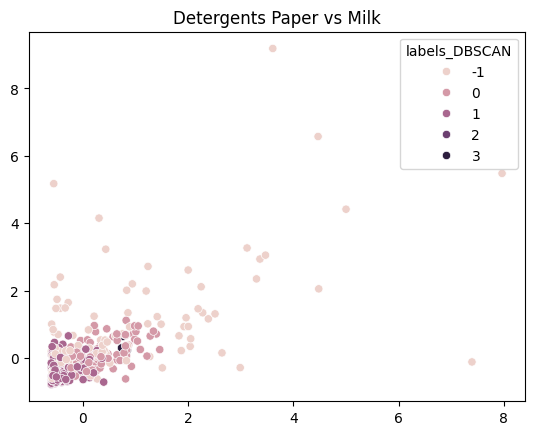

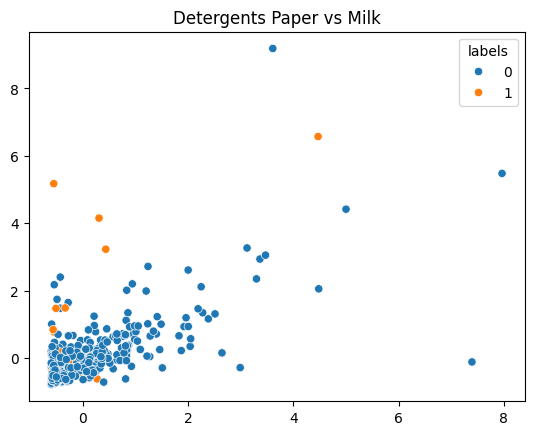

In [14]:
# Your code here:
plot(X_scaled[:, 4], X_scaled[:, 2], customers['labels_DBSCAN'], "Detergents Paper vs Milk")
plot(X_scaled[:, 4], X_scaled[:, 2], customers['labels'], "Detergents Paper vs Milk")

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [15]:
# Your code here:
# -> Grocery was dropped

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

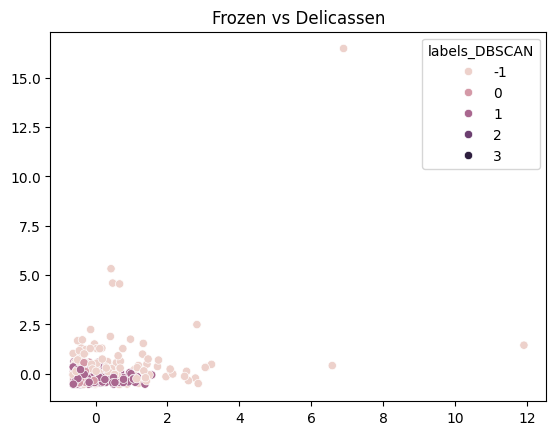

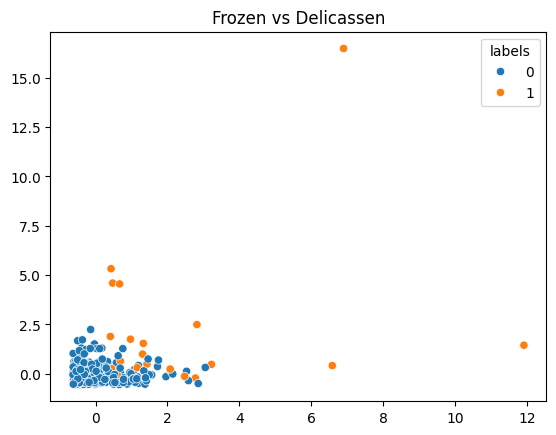

In [20]:
plot(X_scaled[:, 3], X_scaled[:, 5], customers['labels_DBSCAN'], "Frozen vs Delicassen")
plot(X_scaled[:, 3], X_scaled[:, 5], customers['labels'], "Frozen vs Delicassen")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [22]:
# Group by 'labels' and compute means
mean_by_labels = customers.groupby('labels').mean().round(1)

# Group by 'labels_DBSCAN' and compute means
mean_by_labels_dbscan = customers.groupby('labels_DBSCAN').mean().round(1)

# Print results
print("Mean values grouped by labels:")
print(mean_by_labels)
print("\nMean values grouped by labels_DBSCAN:")
print(mean_by_labels_dbscan)

Mean values grouped by labels:
        Channel    Fresh     Milk   Frozen  Detergents_Paper  Delicassen  \
labels                                                                     
0           1.3  10208.6   5453.1   2433.8            2917.0      1231.7   
1           1.1  43056.1  11744.3  14132.8            2266.5      6607.2   

        labels_DBSCAN  
labels                 
0                 0.3  
1                -1.0  

Mean values grouped by labels_DBSCAN:
               Channel    Fresh     Milk  Frozen  Detergents_Paper  \
labels_DBSCAN                                                        
-1                 1.5  17809.0  10770.4  5669.9            5403.2   
 0                 2.0   6727.2   7261.0  1056.8            5024.8   
 1                 1.0   9489.5   2365.0  2211.6             668.6   
 2                 1.0  41446.6   1421.2  1276.4             416.2   
 3                 2.0  11899.0   8297.8   929.5            6099.2   

               Delicassen  labels  
la

Which algorithm appears to perform better?

**Your observations here**

- I think DBSCAN is better, because here is more detail

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [18]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [19]:
# Your code here

**Your comment here**

- 